## may inventory and trip data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [ ]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

In [2]:
%%time
may = pd.read_csv('../data/may.csv')
may = may.sort_values('companyname')

Wall time: 32.9 s


In [3]:
may.head(10)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247000,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,Bird
5028030,2019-05-11 16:46:35.640000,36.162264,-86.771856,PoweredBM9H5,Powered,50.0,scooter,0.0,Bird
5028029,2019-05-11 16:46:35.640000,36.156659,-86.776048,PoweredCPJ2D,Powered,48.0,scooter,0.0,Bird
5028028,2019-05-11 16:46:35.640000,36.153987,-86.796820,PoweredNM176,Powered,97.0,scooter,0.0,Bird
5028027,2019-05-11 16:46:35.640000,36.138335,-86.807256,Powered6GM9U,Powered,87.0,scooter,0.0,Bird
5028026,2019-05-11 16:46:35.640000,36.162575,-86.771640,PoweredKTBB5,Powered,37.0,scooter,0.0,Bird
5028025,2019-05-11 16:46:35.640000,36.171047,-86.782196,PoweredVX7S1,Powered,80.0,scooter,0.0,Bird
5028024,2019-05-11 16:46:35.640000,36.145138,-86.780191,PoweredR1256,Powered,81.0,scooter,0.0,Bird
5028023,2019-05-11 16:46:35.640000,36.152678,-86.797014,PoweredS3KLU,Powered,39.0,scooter,0.0,Bird
5028031,2019-05-11 16:46:35.640000,36.160880,-86.781606,PoweredBHAPC,Powered,100.0,scooter,0.0,Bird


In [4]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20292503 entries, 0 to 10146251
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.5+ GB


In [5]:
may.tail(10)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
12246901,2019-05-23 12:20:08.247000,36.15226,-86.79106,Powered8389404,Powered,99.0,Scooter,0.23,Spin
12246902,2019-05-23 12:20:08.247000,36.15228,-86.78356,Powered7465952,Powered,98.0,Scooter,0.23,Spin
12246903,2019-05-23 12:20:08.247000,36.15349,-86.79385,Powered3643342,Powered,93.0,Scooter,0.23,Spin
12246904,2019-05-23 12:20:08.247000,36.15197,-86.78450,Powered9105973,Powered,98.0,Scooter,0.23,Spin
12246905,2019-05-23 12:20:08.247000,36.17728,-86.75085,Powered9703898,Powered,98.0,Scooter,0.23,Spin
12246906,2019-05-23 12:20:08.247000,36.15089,-86.78283,Powered3555620,Powered,99.0,Scooter,0.23,Spin
12246907,2019-05-23 12:20:08.247000,36.17605,-86.75674,Powered1098749,Powered,92.0,Scooter,0.23,Spin
12246908,2019-05-23 12:20:08.247000,36.14787,-86.80696,Powered4207407,Powered,99.0,Scooter,0.23,Spin
12246897,2019-05-23 12:20:08.247000,36.16875,-86.77273,Powered6588515,Powered,92.0,Scooter,0.23,Spin
10146251,2019-05-20 19:42:33.423000,36.15853,-86.78045,Powered5484396,Powered,99.0,Scooter,0.00,Spin


In [6]:
may.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20292503 entries, 0 to 10146251
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.5+ GB


In [7]:
may.pubdatetime = pd.to_datetime(may.pubdatetime)
may.head(10)

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,Bird
5028030,2019-05-11 16:46:35.640,36.162264,-86.771856,PoweredBM9H5,Powered,50.0,scooter,0.0,Bird
5028029,2019-05-11 16:46:35.640,36.156659,-86.776048,PoweredCPJ2D,Powered,48.0,scooter,0.0,Bird
5028028,2019-05-11 16:46:35.640,36.153987,-86.796820,PoweredNM176,Powered,97.0,scooter,0.0,Bird
5028027,2019-05-11 16:46:35.640,36.138335,-86.807256,Powered6GM9U,Powered,87.0,scooter,0.0,Bird
5028026,2019-05-11 16:46:35.640,36.162575,-86.771640,PoweredKTBB5,Powered,37.0,scooter,0.0,Bird
5028025,2019-05-11 16:46:35.640,36.171047,-86.782196,PoweredVX7S1,Powered,80.0,scooter,0.0,Bird
5028024,2019-05-11 16:46:35.640,36.145138,-86.780191,PoweredR1256,Powered,81.0,scooter,0.0,Bird
5028023,2019-05-11 16:46:35.640,36.152678,-86.797014,PoweredS3KLU,Powered,39.0,scooter,0.0,Bird
5028031,2019-05-11 16:46:35.640,36.160880,-86.781606,PoweredBHAPC,Powered,100.0,scooter,0.0,Bird


In [8]:
may.sumdgroup.unique()

array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [9]:
may_scooters = may.loc[may.sumdgroup.isin(['scooter', 'scooter'])]

In [10]:
may_scooters = may_scooters[['pubdatetime', "latitude", 'longitude', 'sumdid', 'chargelevel', 'costpermin', 'companyname']]

In [11]:
may_scooters.to_pickle('../data/may.pkl')

In [12]:
%%time
may_inv = pd.read_pickle("../data/may.pkl")

Wall time: 1.85 s


In [13]:
may_inv.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0.0,Bird
5028030,2019-05-11 16:46:35.640,36.162264,-86.771856,PoweredBM9H5,50.0,0.0,Bird
5028029,2019-05-11 16:46:35.640,36.156659,-86.776048,PoweredCPJ2D,48.0,0.0,Bird
5028028,2019-05-11 16:46:35.640,36.153987,-86.796820,PoweredNM176,97.0,0.0,Bird
5028027,2019-05-11 16:46:35.640,36.138335,-86.807256,Powered6GM9U,87.0,0.0,Bird


In [14]:
%%time
may_inv['geometry'] = may_inv.apply(lambda x: Point((x.longitude, x.latitude)), axis=1)

Wall time: 14min 21s


In [16]:
may_inv.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0.0,Bird,POINT (-86.799877 36.136822)
5028030,2019-05-11 16:46:35.640,36.162264,-86.771856,PoweredBM9H5,50.0,0.0,Bird,POINT (-86.771856 36.162264)
5028029,2019-05-11 16:46:35.640,36.156659,-86.776048,PoweredCPJ2D,48.0,0.0,Bird,POINT (-86.776048 36.156659)
5028028,2019-05-11 16:46:35.640,36.153987,-86.796820,PoweredNM176,97.0,0.0,Bird,POINT (-86.79682 36.153987)
5028027,2019-05-11 16:46:35.640,36.138335,-86.807256,Powered6GM9U,87.0,0.0,Bird,POINT (-86.807256 36.138335)


In [21]:
test = may_inv.head(1000)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 14010787
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pubdatetime  1000 non-null   datetime64[ns]
 1   latitude     1000 non-null   float64       
 2   longitude    1000 non-null   float64       
 3   sumdid       1000 non-null   object        
 4   chargelevel  1000 non-null   float64       
 5   costpermin   1000 non-null   float64       
 6   companyname  1000 non-null   object        
 7   geometry     1000 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 70.3+ KB


In [24]:
test = gpd.GeoDataFrame(test)

In [31]:
test.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0.0,Bird,POINT (-86.79988 36.13682)
5028030,2019-05-11 16:46:35.640,36.162264,-86.771856,PoweredBM9H5,50.0,0.0,Bird,POINT (-86.77186 36.16226)
5028029,2019-05-11 16:46:35.640,36.156659,-86.776048,PoweredCPJ2D,48.0,0.0,Bird,POINT (-86.77605 36.15666)
5028028,2019-05-11 16:46:35.640,36.153987,-86.796820,PoweredNM176,97.0,0.0,Bird,POINT (-86.79682 36.15399)
5028027,2019-05-11 16:46:35.640,36.138335,-86.807256,Powered6GM9U,87.0,0.0,Bird,POINT (-86.80726 36.13833)


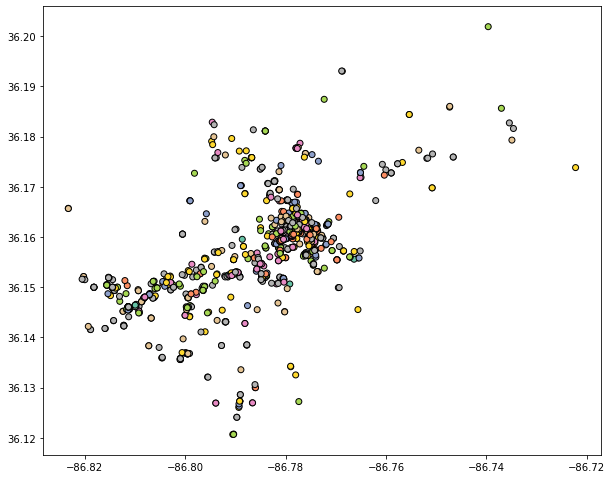

In [52]:
test.plot(column = 'chargelevel', figsize=(10, 10),
              edgecolor = 'black',
              cmap = 'Set2')
plt.show()

In [33]:
may_companies = list(enumerate(may_inv.companyname.unique()))
may_companies

[(0, 'Bird'), (1, 'Jump'), (2, 'Lime'), (3, 'Lyft')]

In [34]:
unique_scooter = may_inv['sumdid'].unique()
unique_scooter

array(['PoweredLIRL1', 'PoweredBM9H5', 'PoweredCPJ2D', ...,
       'Powered626840', 'Powered620931', 'Powered523737'], dtype=object)

In [60]:
may_inv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17542872 entries, 0 to 4156639
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   costpermin   float64       
 6   companyname  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.5+ GB


In [61]:
may_inv.value_counts('companyname')

companyname
Lime    7111655
Bird    4334006
Lyft    3112581
Jump    2984630
dtype: int64

In [87]:
full_charge = may_inv.loc[may_inv['chargelevel'] == 100]
full_charge

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname
5028031,2019-05-11 16:46:35.640,36.160880,-86.781606,PoweredBHAPC,100.0,0.00,Bird
5028019,2019-05-11 16:46:35.640,36.149458,-86.802880,Powered73YE6,100.0,0.00,Bird
5028013,2019-05-11 16:46:35.640,36.167333,-86.779777,PoweredR2YNT,100.0,0.00,Bird
5028052,2019-05-11 16:46:35.640,36.157369,-86.774410,PoweredEENVL,100.0,0.00,Bird
5028049,2019-05-11 16:46:35.640,36.174591,-86.757690,PoweredTHH21,100.0,0.00,Bird
...,...,...,...,...,...,...,...
15048852,2019-05-26 13:00:50.670,36.160314,-86.775060,Powered320269,100.0,0.15,Lyft
15048856,2019-05-26 13:00:51.827,36.148327,-86.799263,Powered214566,100.0,0.15,Lyft
15048851,2019-05-26 13:00:50.410,36.150066,-86.812923,Powered882104,100.0,0.15,Lyft
15048846,2019-05-26 13:00:49.530,36.164217,-86.769578,Powered535797,100.0,0.15,Lyft


In [84]:
dead = may_inv.loc[may_inv['chargelevel'] <5]
dead

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname
11335321,2019-05-22 12:31:42.000,36.161000,-86.773500,Powered2bc91853-75ba-55b0-b6ee-9132dfdafe63,0.85,0.06,Jump
11475808,2019-05-22 15:51:42.000,36.161700,-86.775800,Powered75c4a8c5-c6e6-5a4e-a9a7-25d4bb42d5a0,0.74,0.06,Jump
11475807,2019-05-22 15:51:42.000,36.173200,-86.774000,Powered8002d3a9-7950-56d2-a49b-e262eacacd7d,0.00,0.06,Jump
11475806,2019-05-22 15:51:42.000,36.138000,-86.800600,Powered2e022e3b-44b5-55eb-aa56-e7bf3cb1bdf1,0.69,0.06,Jump
11475809,2019-05-22 15:51:42.000,36.136400,-86.788500,Powered63b49131-89a6-59a4-b060-2cca20219149,0.37,0.06,Jump
...,...,...,...,...,...,...,...
6946049,2019-05-15 16:08:36.413,36.133782,-86.791908,PoweredY2SADNNANTQVG,2.00,0.00,Lime
6946064,2019-05-15 16:08:36.413,36.133755,-86.791852,PoweredCMRYHRBQLZI6U,0.00,0.00,Lime
10979284,2019-05-22 01:29:33.950,36.176305,-86.753577,PoweredWVFI75OCKRHFG,0.00,0.15,Lime
7361547,2019-05-16 10:04:17.603,36.176239,-86.753573,PoweredQIJGH63RH4LCR,0.00,0.00,Lime


array([[<AxesSubplot:title={'center':'chargelevel'}>]], dtype=object)

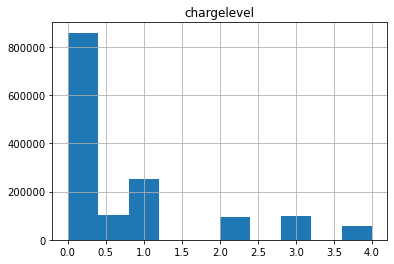

In [113]:
dead.hist('chargelevel', bins= 10)

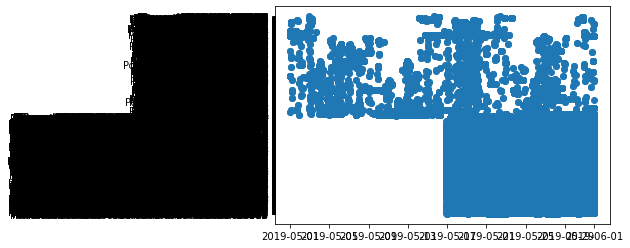

In [104]:
plt.scatter(x='pubdatetime', y= 'sumdid', data = dead)

### may_trip data to join

In [17]:
%%time
may_trip = pd.read_csv('../data/may_trip.csv')
may_trip = may_trip.sort_values('companyName')

Wall time: 3.01 s


In [94]:
may_trip.head(5)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.1571,-86.8036,36.1566,-86.8067,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
57730,2019-05-10 03:21:39.897000,Bird,BRD2206,PoweredMHHRQ,8.0,2296.58800,2019-05-10 00:00:00,03:14:29.646666,2019-05-10 00:00:00,03:22:38.420000,36.1643,-86.7789,36.1617,-86.7836,"[[36.164639,-86.778543],[36.164844,-86.778543]...",2019-05-11 05:30:55.037000
57731,2019-05-10 03:21:39.897000,Bird,BRD2210,PoweredV5XR1,14.0,3389.10772,2019-05-10 00:00:00,03:08:28.380000,2019-05-10 00:00:00,03:22:00.823333,36.1626,-86.7716,36.1610,-86.7741,"[[36.162651,-86.771524],[36.162651,-86.771524]...",2019-05-11 05:30:55.173000
57732,2019-05-10 03:21:39.897000,Bird,BRD2208,Powered6S7KT,8.0,6223.75348,2019-05-10 00:00:00,03:13:57.460000,2019-05-10 00:00:00,03:22:04.170000,36.1515,-86.7940,36.1602,-86.7785,"[[36.15157,-86.793945],[36.15157,-86.793945],[...",2019-05-11 05:30:55.103000
57733,2019-05-10 03:21:39.897000,Bird,BRD2212,PoweredF5YNQ,34.0,11482.94000,2019-05-10 00:00:00,02:48:07.756666,2019-05-10 00:00:00,03:21:45.076666,36.1675,-86.8208,36.1563,-86.8344,"[[36.167614,-86.820607999999993],[36.167433,-8...",2019-05-11 05:30:55.397000


In [95]:
may_trip.columns = may_trip.columns.str.lower()

In [97]:
may_trip.head(5)

,pubtimestamp,companyname,triprecordnum,sumdid,tripduration,tripdistance,startdate,starttime,enddate,endtime,startlatitude,startlongitude,endlatitude,endlongitude,triproute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.1571,-86.8036,36.1566,-86.8067,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
57730,2019-05-10 03:21:39.897000,Bird,BRD2206,PoweredMHHRQ,8.0,2296.58800,2019-05-10 00:00:00,03:14:29.646666,2019-05-10 00:00:00,03:22:38.420000,36.1643,-86.7789,36.1617,-86.7836,"[[36.164639,-86.778543],[36.164844,-86.778543]...",2019-05-11 05:30:55.037000
57731,2019-05-10 03:21:39.897000,Bird,BRD2210,PoweredV5XR1,14.0,3389.10772,2019-05-10 00:00:00,03:08:28.380000,2019-05-10 00:00:00,03:22:00.823333,36.1626,-86.7716,36.1610,-86.7741,"[[36.162651,-86.771524],[36.162651,-86.771524]...",2019-05-11 05:30:55.173000
57732,2019-05-10 03:21:39.897000,Bird,BRD2208,Powered6S7KT,8.0,6223.75348,2019-05-10 00:00:00,03:13:57.460000,2019-05-10 00:00:00,03:22:04.170000,36.1515,-86.7940,36.1602,-86.7785,"[[36.15157,-86.793945],[36.15157,-86.793945],[...",2019-05-11 05:30:55.103000
57733,2019-05-10 03:21:39.897000,Bird,BRD2212,PoweredF5YNQ,34.0,11482.94000,2019-05-10 00:00:00,02:48:07.756666,2019-05-10 00:00:00,03:21:45.076666,36.1675,-86.8208,36.1563,-86.8344,"[[36.167614,-86.820607999999993],[36.167433,-8...",2019-05-11 05:30:55.397000
